In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

Data exploration on US_trending_videos.json to further clean it

In [2]:
trending_df = pd.read_csv('C:/Users/TKN/Downloads/New-Youtube-Scraper-v3/data/visualization_csvs/trending_data_viz.csv')
trending_df_beast = pd.read_csv('C:/Users/TKN/Downloads/New-Youtube-Scraper-v3/data/visualization_csvs/trending_data_viz_mrbeast.csv')
channel_df = pd.read_csv('C:/Users/TKN/Downloads/New-Youtube-Scraper-v3/data/visualization_csvs/channel_video_data_viz.csv')

In [3]:
trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   publishedAt      651 non-null    object 
 1   elapsedDays      651 non-null    float64
 2   title            651 non-null    object 
 3   channelTitle     651 non-null    object 
 4   category         651 non-null    object 
 5   topicCategories  651 non-null    object 
 6   duration         651 non-null    object 
 7   licensedContent  651 non-null    bool   
 8   viewCount        651 non-null    int64  
 9   likeCount        651 non-null    int64  
 10  commentCount     651 non-null    int64  
 11  avgDailyViews    651 non-null    float64
 12  engagementRate   651 non-null    float64
 13  isTrending       651 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 66.9+ KB


In [4]:
topic_df = trending_df['topicCategories']
topic_df.head(5)

0                   ['Music', 'Pop music']
1                ['Entertainment', 'Film']
2                   ['Music', 'Pop music']
3    ['Action game', 'Video game culture']
4     ['Fashion', 'Lifestyle (sociology)']
Name: topicCategories, dtype: object

['Music', 'Pop music', 'Entertainment', 'Film', 'Music', 'Pop music', 'Action game', 'Video game culture', 'Fashion', 'Lifestyle (sociology)', 'Association football', 'Sport', 'Action game', 'Video game culture', 'Electronic music', 'Music', 'Music of Asia', 'Pop music', 'Association football', 'Sport', 'Lifestyle (sociology)', 'Music', 'Pop music', 'Lifestyle (sociology)', 'Lifestyle (sociology)', 'Pop music', 'Motorsport', 'Sport', 'Cricket', 'Sport', 'Hip hop music', 'Music', 'Music of Latin America', 'Food', 'Lifestyle (sociology)', 'Lifestyle (sociology)', 'Technology', 'Music', 'Pop music', 'Cricket', 'Sport', 'Music', 'Music of Latin America', 'Pop music', 'Hobby', 'Lifestyle (sociology)', 'Basketball', 'Lifestyle (sociology)', 'Hip hop music', 'Music', 'Music of Latin America', 'Pop music', 'Entertainment', 'Lifestyle (sociology)', 'Politics', 'Society', 'Television program', 'Sport', 'Independent music', 'Music', 'Pop music', 'Rock music', 'Society', 'Television program', 'Act

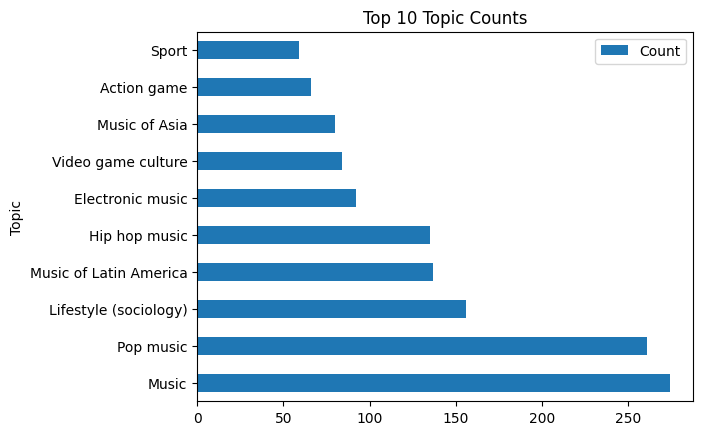

In [5]:
from collections import Counter

# Concatenate all lists in topic_df into one big list
all_topics = [item for sublist in topic_df.dropna() for item in eval(sublist)]
print(all_topics)

topic_counts = Counter(all_topics)
print(topic_counts)

# Convert the Counter object to a DataFrame for easier plotting
topic_counts_df = pd.DataFrame.from_dict(topic_counts, orient='index').reset_index()
topic_counts_df.columns = ['Topic', 'Count']

# Plot the top 10 topic counts
top_10_topics = topic_counts_df.sort_values(by='Count', ascending=False).head(10)
top_10_topics.plot(kind='barh', x='Topic', y='Count', title='Top 10 Topic Counts')
plt.show()

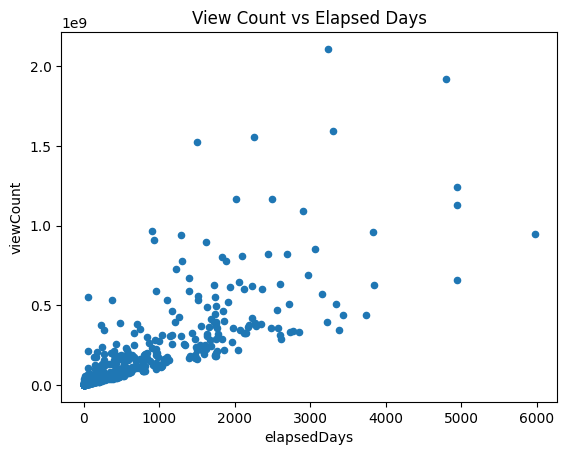

In [6]:
# Scatter plot of viewCount and elapsedDays
trending_df.plot(kind='scatter', x='elapsedDays', y='viewCount', title='View Count vs Elapsed Days')
plt.show()

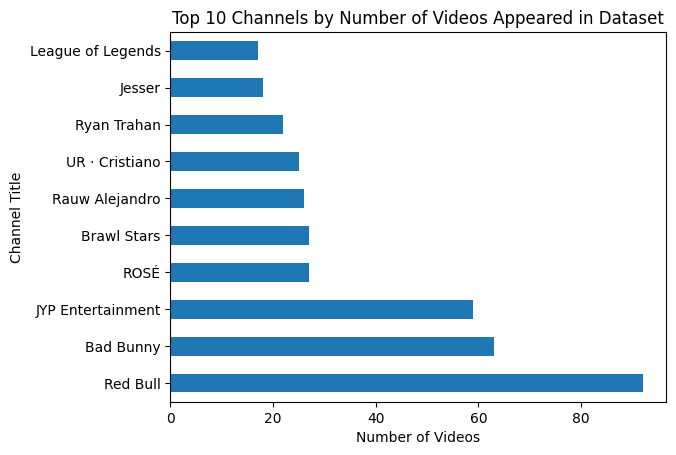

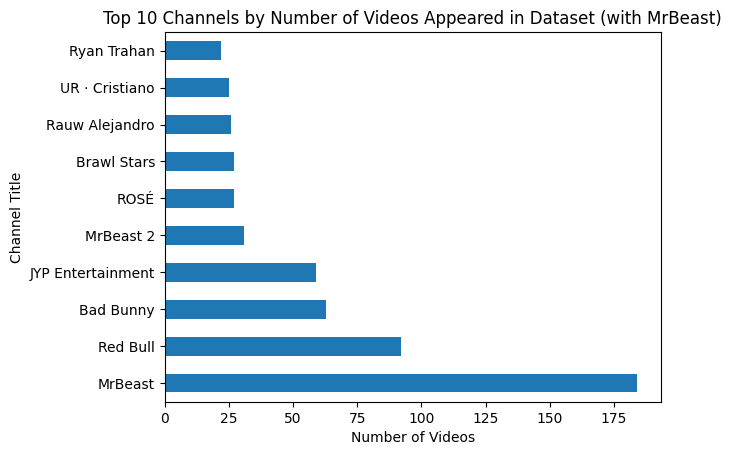

In [7]:
top_10_channels = trending_df['channelTitle'].value_counts().head(10)
top_10_channels_beast = trending_df_beast['channelTitle'].value_counts().head(10)
top_10_channels.plot(kind='barh', title='Top 10 Channels by Number of Videos Appeared in Dataset')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.show()
top_10_channels_beast.plot(kind='barh', title='Top 10 Channels by Number of Videos Appeared in Dataset (with MrBeast)')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.show()

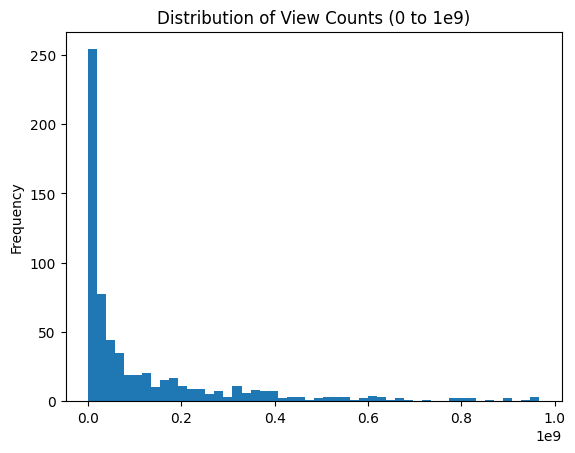

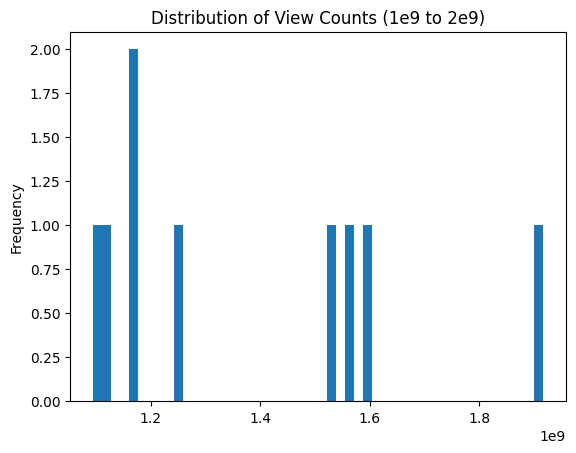

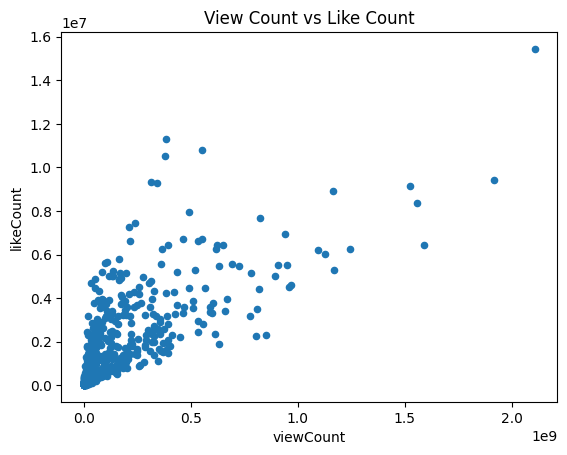

In [8]:
# Plot the distribution of view counts
# Plot the distribution of view counts from 0 to 1e9
ax1 = trending_df[trending_df['viewCount'] <= 1e9]['viewCount'].plot(kind='hist', bins=50, title='Distribution of View Counts (0 to 1e9)')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# Plot the distribution of view counts from 1e9 to 2e9
ax2 = trending_df[(trending_df['viewCount'] > 1e9) & (trending_df['viewCount'] <= 2e9)]['viewCount'].plot(kind='hist', bins=50, title='Distribution of View Counts (1e9 to 2e9)')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# Plot the relationship between view count and like count
ax3 = trending_df.plot(kind='scatter', x='viewCount', y='likeCount', title='View Count vs Like Count')

<Axes: title={'center': 'Number of Videos per Category'}, ylabel='category'>

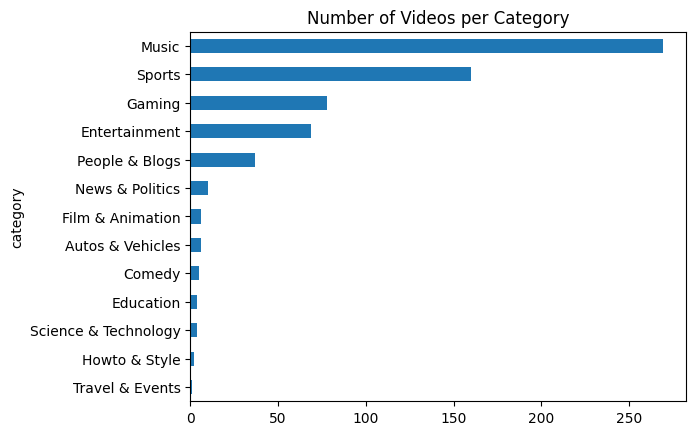

In [9]:
# Plot the number of videos per category with the highest bar on top
trending_df['category'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Number of Videos per Category')

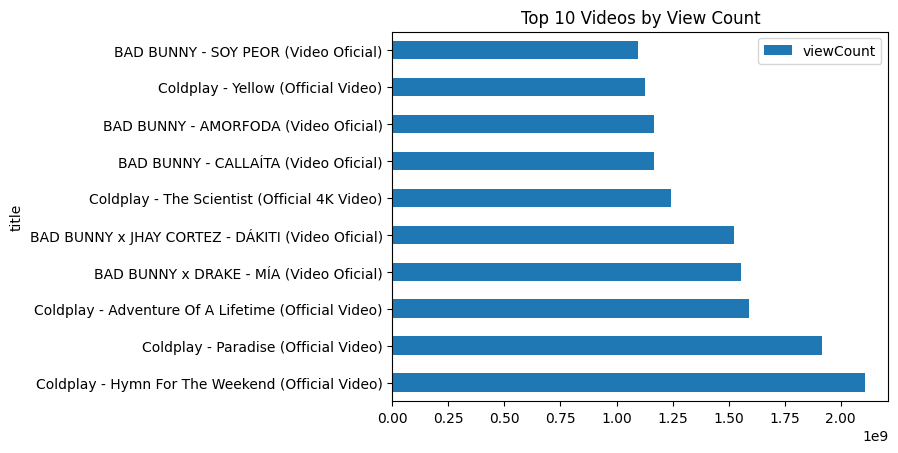

In [10]:
top_10_videos = trending_df.sort_values(by='viewCount', ascending=False).head(10)
top_10_videos.plot(kind='barh', x='title', y='viewCount', title='Top 10 Videos by View Count')
plt.show()

C:\Users\TKN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


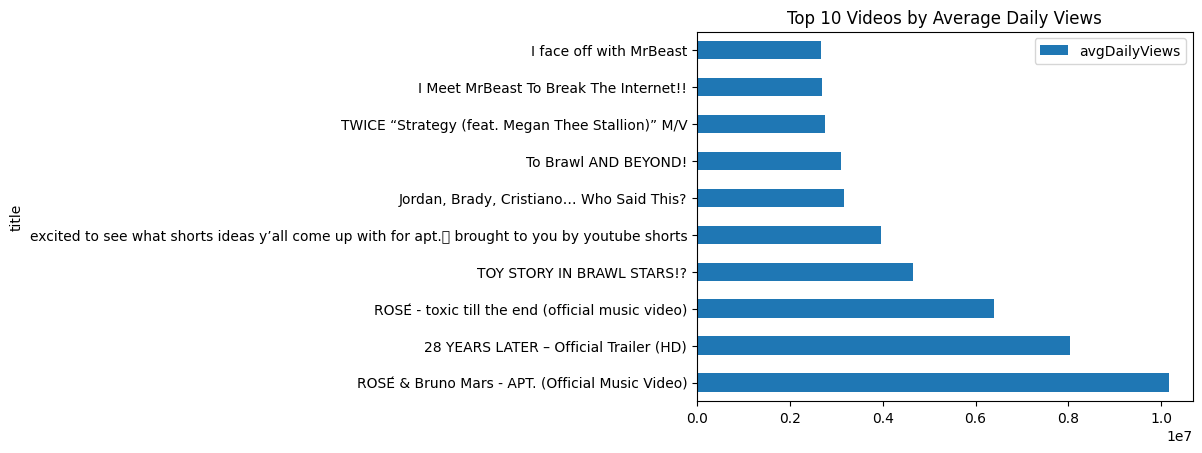

In [11]:
top_10_avg_daily_views = trending_df.sort_values(by='avgDailyViews', ascending=False).head(10)
top_10_avg_daily_views.plot(kind='barh', x='title', y='avgDailyViews', title='Top 10 Videos by Average Daily Views')
plt.xticks(rotation=0)
plt.show()

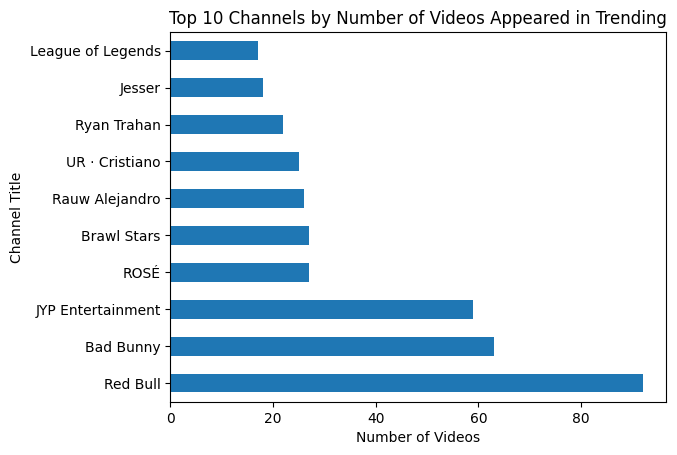

In [12]:
top_channels = trending_df['channelTitle'].value_counts().head(10)
top_channels.plot(kind='barh', title='Top 10 Channels by Number of Videos Appeared in Trending')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.show()

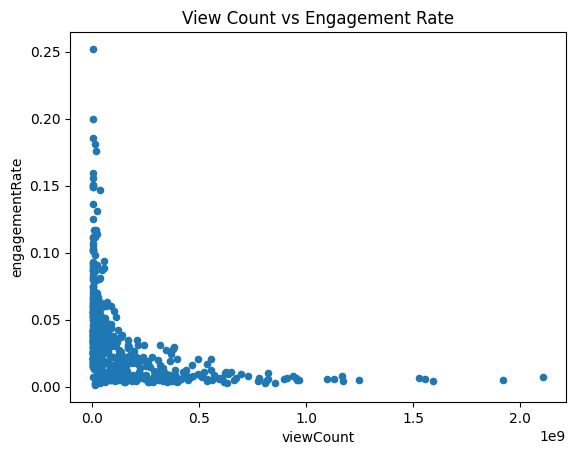

In [13]:
trending_df.plot(kind='scatter', x='viewCount', y='engagementRate', title='View Count vs Engagement Rate')
plt.show()

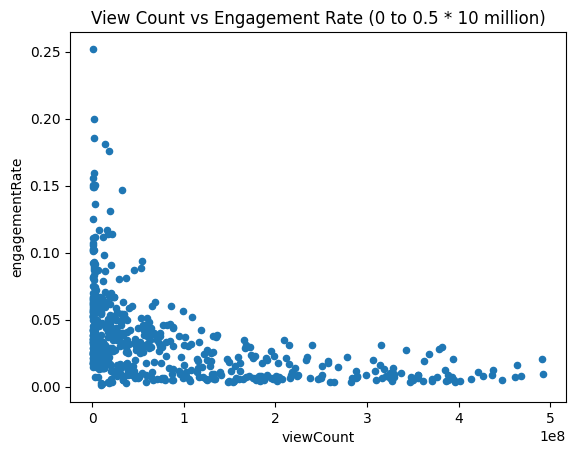

In [14]:
from matplotlib.ticker import ScalarFormatter

# Filter the dataframe to include only rows where viewCount is between 0 and 0.5 * 1e9
filtered_df = trending_df[(trending_df['viewCount'] >= 0) & (trending_df['viewCount'] <= 0.5 * 1e9)]

# Create the scatter plot
ax = filtered_df.plot(
    kind='scatter',
    x='viewCount',
    y='engagementRate',
    title='View Count vs Engagement Rate (0 to 0.5 * 10 million)'
)

# Apply the formatter to the x-axis
ax.xaxis.get_offset_text().set_text("10 million")

# Show the plot
plt.show()

<Axes: title={'center': 'Distribution of Engagement Rates'}, ylabel='Frequency'>

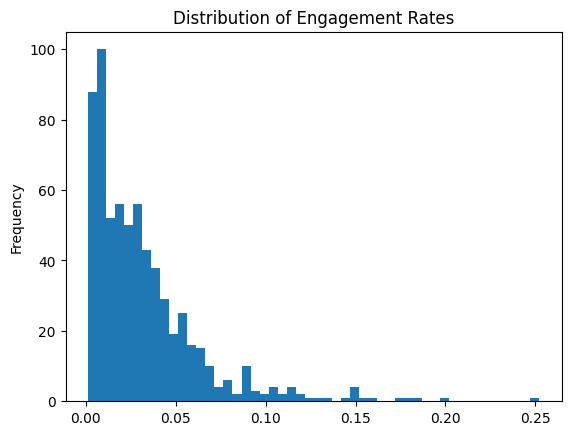

In [15]:
# Plot the engagement rate distribution
trending_df['engagementRate'].plot(kind='hist', bins=50, title='Distribution of Engagement Rates')
